In [22]:
from markethistory import MarketHistory
from agent import Agent
from constants import * 
from networks import *
import pandas as pd
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [121]:
start = '2017/09/01'
end = '2018/04/20'
markethistory = MarketHistory(config)

TypeError: __init__() takes 2 positional arguments but 3 were given

In [68]:
markethistory.data[0].shape

(11, 11089)

In [99]:
df = pd.DataFrame(markethistory.data[0])
m_short = df.rolling(window=10, axis=1).mean().as_matrix()[None, :, :]
m_long = df.rolling(window=200, axis=1).mean().as_matrix()[None, :, :]

In [100]:
markethistory.data[0][2].shape

(11089,)

/Users/kevin/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


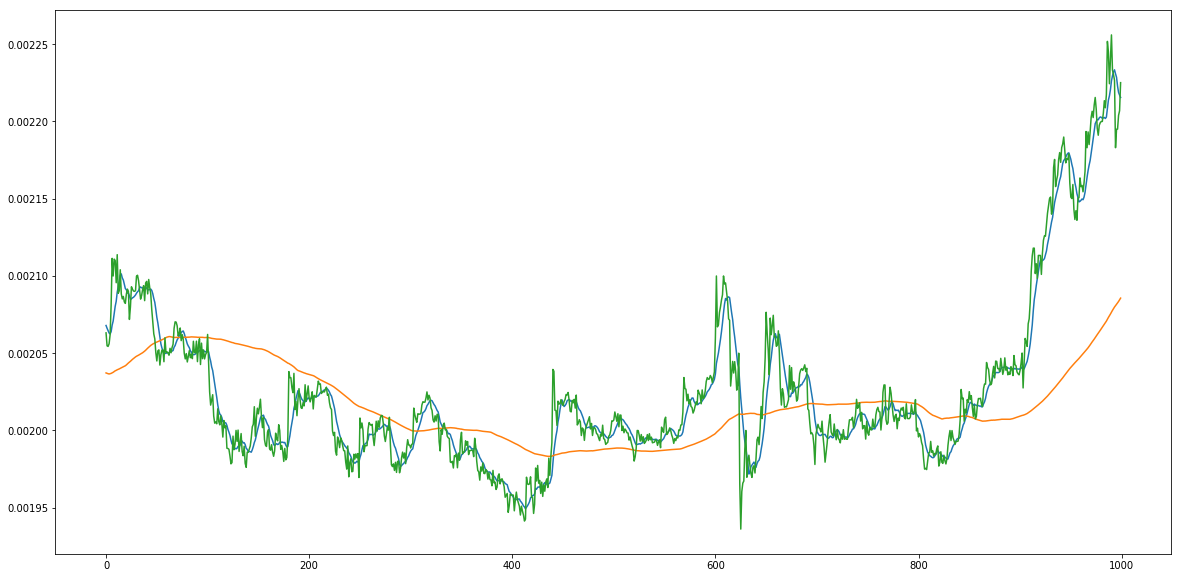

In [101]:
plt.figure(figsize=(20, 10))
plt.plot(m_short[0][2][-1000:])
plt.plot(m_long[0][2][-1000:])
plt.plot(markethistory.data[0][2][-1000:])
plt.legend()

In [41]:
m12.shape

(1, 15, 49153)

In [43]:
np.vstack((markethistory.data, m12)).shape

(5, 15, 49153)

In [36]:
m12.shape

(15, 49153)

In [40]:
net = DecisionNetwork_CNN()
agent = Agent(net, markethistory)